In [504]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [562]:
china_city = []
china_city_position = []

In [563]:
with open("city.txt",encoding='utf-8') as f:
    for line in f.readlines():
        line = line.strip("\n").split("\t")
        china_city.append(line[0])
        china_city_position.append([eval(line[1]),eval(line[2])])
# china_city_position

In [507]:
dict = {}
for i in range(city_num):
    dict[china_city[i]] = china_city_position[i]
dict['乌鲁木齐'] = [91,33.9]
dict['拉萨'] = [94.2,18.2]
dict['西宁'] = [103,25.6] # 青海
dict['兰州'] = [104.9,25]# 甘肃
dict['成都'] = [105,19] #四川
dict['昆明'] = [104,12.5]
dict['银川'] = [107,27.8] #宁夏
dict['重庆'] = [107.2,17.8]
dict['贵阳'] = [107.3,14.4] #贵州
dict['西安'] = [109.2,23] # 陕西
dict['南宁'] = [108.7,10.0]# 广西
dict['海口'] = [110.5,7]
dict['呼和浩特'] = [111.5,30.5]
dict['太原'] = [112.3,27] #山西
dict['石家庄'] = [114,27.4]  #河北
dict['北京'] = [115.5,29.5]
dict['天津'] = [116.5,28.5]
dict['济南'] = [116,25.8] #山东
dict['郑州'] = [113.2,23.5]#河南
dict['合肥'] = [116.5,20.3]  #安徽
dict['南京'] = [117.5,20.5] #江苏
dict['杭州'] = [118.8,18.5] # 浙江
dict['上海'] = [120,19.4]
dict['武汉'] = [113.8,18.8]# 湖北
dict['长沙'] = [112.7,16]
dict['南昌'] = [115.2,16.8] # 江西
dict['福州'] = [118.0,13.8]# 福建
dict['台北'] = [119.7,12.7]  #台湾
dict['广州'] = [113,10.4]
dict['香港'] = [113.0,9.0]
dict['澳门'] = [113.9,9.4]
dict['沈阳'] = [121.5,31.5]
dict['长春'] = [123.2,34]
dict['哈尔滨'] = [124.3,36]

d = []
for item in dict:
    d.append(dict[item])
x = np.array(d)[:,0]
y = np.array(d)[:,1]
len(x)

34

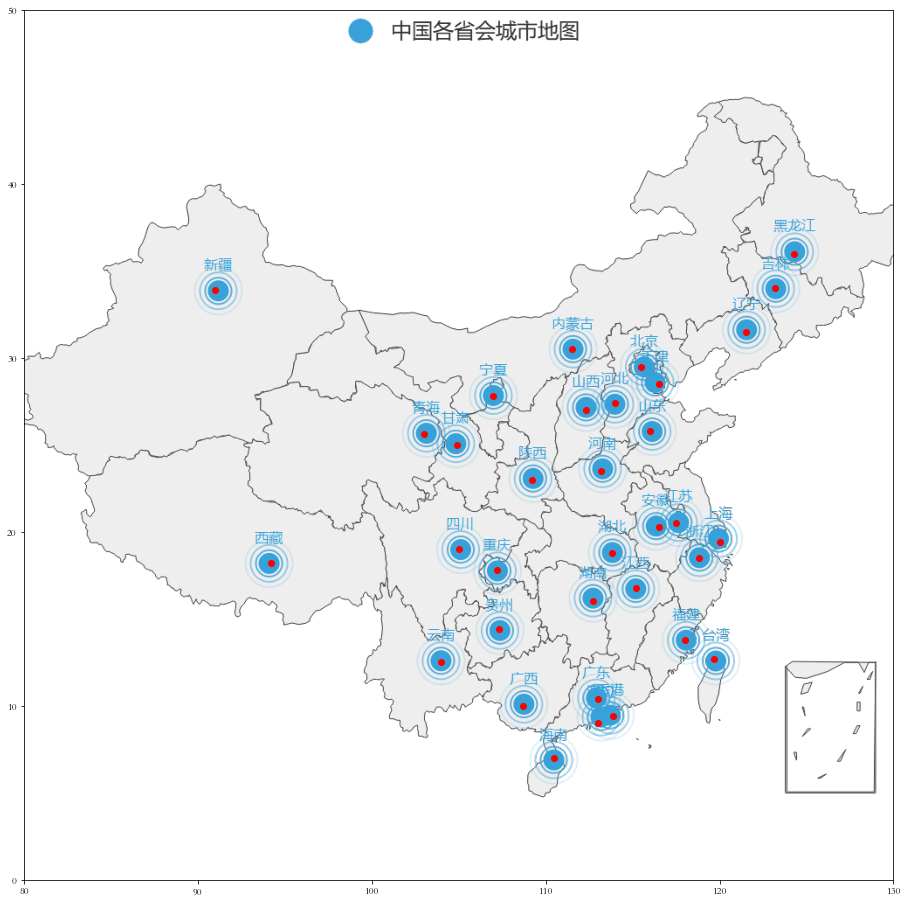

In [508]:
plt.figure(figsize=(16,16))

img = plt.imread("map_marked_sdd.png")
plt.imshow(img,extent=[80,130,0,50])
my_x_ticks = np.arange(80,130,1)
my_y_ticks = np.arange(0,50,1)
# plt.xticks(my_x_ticks)
# plt.yticks(my_y_ticks)
plt.scatter(x,y, color='r')
plt.show()

初始解
 [19 22  3 10 31 14 16  2  7 17 25 15 30 24 27 32 18 11 33  9 20  5  1  4
  6 29 28  8  0 23 13 26 21 12]
初始路径总长度： 511.6546263003162
城市数量：34, 最优路径：[ 0  1  9 10 11 15 18 17  2 19 25 20 21 23 22 24 32 33 26  8 31 30  3 29
  4  5 14 27  6 28 16 13  7 12], 结果距离为：155.42
最优城市选择为：
北京—>天津—>哈尔滨—>长春—>沈阳—>济南—>合肥—>南京—>上海—>杭州—>台北—>福州—>南昌—>武汉—>长沙—>广州—>香港—>澳门—>海口—>南宁—>昆明—>贵阳—>重庆—>成都—>拉萨—>乌鲁木齐—>西宁—>兰州—>银川—>西安—>郑州—>太原—>呼和浩特—>石家庄—>北京


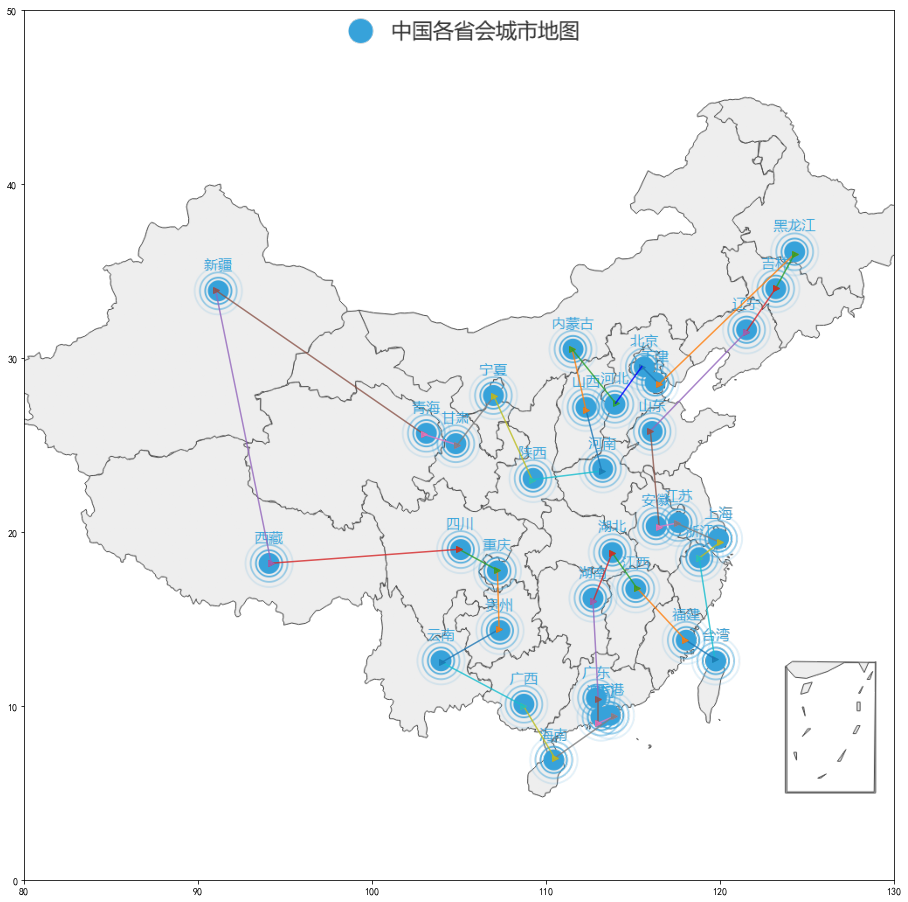

In [418]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

%matplotlib inline

city_num = len(china_city)  # 城市的数量
C = np.array(china_city_position) # 传入的经纬度

best_iter = []
###############相关函数：距离和亲和度函数（路程） 路径画图函数################

####.函数：计算城市之间的距离
def calculate_distance(X, Y):
    """
    计算城市两辆之间的欧式距离，结果用numpy矩阵存储
    :param X: 城市的X坐标，np.array数组
    :param Y: 城市的Y坐标，np.array数组
    """
    distance_matrix = np.zeros((city_num, city_num))
    for i in range(city_num):
        for j in range(city_num):
            if i == j:
                continue
            dis = np.sqrt((X[i] - X[j]) ** 2 + (Y[i] - Y[j]) ** 2)  # 欧式距离计算
            distance_matrix[i][j] = dis
    return distance_matrix


## 适应度函数 计算总距离
def fitness_func(distance_matrix, xi):
    """
    适应度函数，计算目标函数值.
    :param distance: 城市的距离矩阵
    :param xi: 的一个解
    :return: 目标函数值，即总距离
    """
    total_distance = 0
    for i in range(1, city_num):
        start = xi[i - 1]
        end = xi[i]
        total_distance += distance_matrix[start][end] # 这里是输入一个路径，列表形式，需要算出此条路径的一个总距离
    total_distance += distance_matrix[end][xi[0]]  # 从最后一个城市回到出发城市
    return total_distance


#路径画图
def plot_tsp(gbest): # 传入的是最优路径，list形式[2 16 18 22 15 3 7 8 9 1 4 5 6 12 10 11 13 14 0 28 30 29 26 27 25 24 23 19 20 21 17]
    """绘制最优解的图形"""
    
    plt.figure(figsize=(16,16))
    img = plt.imread(r"C:\Users\dell\Desktop\map_marked_sdd.png")
    plt.imshow(img,extent=[80,130,0,50])
    my_x_ticks = np.arange(80,130,1)
    my_y_ticks = np.arange(0,50,1)
    dict = {'北京': [115.5, 29.5],'天津': [116.5, 28.5],'上海': [120, 19.4],'重庆': [107.2, 17.8], '拉萨': [94.2, 18.2],'乌鲁木齐': [91, 33.9],
 '银川': [107, 27.8],'呼和浩特': [111.5, 30.5],'南宁': [108.7, 10.0],'哈尔滨': [124.3, 36],'长春': [123.2, 34], '沈阳': [121.5, 31.5],
 '石家庄': [114, 27.4],'太原': [112.3, 27],'西宁': [103, 25.6],'济南': [116, 25.8],'郑州': [113.2, 23.5],'南京': [117.5, 20.5],'合肥': [116.5, 20.3],
'杭州': [118.8, 18.5],'福州': [118.0, 13.8],'南昌': [115.2, 16.8],'长沙': [112.7, 16],'武汉': [113.8, 18.8],'广州': [113, 10.4],'台北': [119.7, 12.7],
 '海口': [110.5, 7],'兰州': [104.9, 25],'西安': [109.2, 23],'成都': [105, 19],'贵阳': [107.3, 14.4],'昆明': [104, 12.5],'香港': [113.0, 9.0],'澳门': [113.9, 9.4]}
    d = []
    for item in dict:
        d.append(dict[item])
    x = np.array(d)[:,0]
    y = np.array(d)[:,1]
    for i in range(1, city_num):
        start_x, start_y = x[gbest[i - 1]], y[gbest[i - 1]]
        end_x, end_y = x[gbest[i]], y[gbest[i]]
        plt.plot([start_x, end_x], [start_y, end_y], marker='>',alpha=0.8)
    start_x, start_y = x[gbest[0]], y[gbest[0]]
    plt.plot([start_x, end_x], [start_y, end_y], color='b', alpha=0.8)
    plt.show()
    


#=======在现有路径上采用2变换法，返回新的路径====
def getNewPath(cur_path): # 这里是返回一条随机的路径，可以采取别的方式
    #cur_path=np.random.choice(range(31),31,replace=False)
    path = cur_path.copy()
    u = np.random.randint(0,city_num,1)[0] # 从0-34随机选取一个数字
    v = np.random.randint(0,city_num,1)[0]
    while u==v:
        v = np.random.randint(0, city_num, 1)[0]
    path[u:v] = list(reversed(path[u:v]))
    return path

#############模拟退火算法开始############

D = calculate_distance(C[:,0], C[:,1])#任意两个城市距离间隔矩阵 shape=(31, 31)
# 初始温度，结束温度
t_init = 50
t_final = 1e-7
# 温度衰减系数
a = 0.98
# 迭代次数
markovlen = 100
x = []

def SA_TSP():
    # 获取初始距离矩阵
    D=calculate_distance(C[:,0], C[:,1])#任意两个城市距离间隔矩阵 shape=(31, 31)
    # 得到初始解
    cur_path = np.random.choice(range(city_num),city_num,replace=False)
    print('初始解\n',cur_path)
    cur_dis=fitness_func(D, cur_path) # 计算此条通路的长度，实际上就是适应度函数
    print('初始路径总长度：',cur_dis)
    best_path = cur_path # 最优解，即最优路径
    best_dis = cur_dis # 最优解对应的路径长度
    t = t_init#当前温度
    while t > t_final:#如果温度小于最小温度
        #print('当前温度t:',t)
        for point in range(markovlen):#当前温度t,进行markovlen次迭代
            new_path = getNewPath(cur_path)#新的解
            new_dis = fitness_func(D, new_path)#新的解 对应的路径长度

            delt = new_dis - cur_dis #能量差

            if delt <= 0:  # 表示得到优解
                cur_path = new_path
                cur_dis = new_dis
                #==是否是全局最优解==
                if best_dis > cur_dis:
                    best_dis = cur_dis
                    best_path = cur_path
            else:  # 得到较差解
                p = np.math.exp(-delt / t)
                if np.random.random() < p:  # 接受差解
                    cur_path = new_path
                    cur_dis = new_dis
        best_iter.append(best_dis)
        t *= a  # 退火
    
    print("城市数量：{}, 最优路径：{}, 结果距离为：{:.2f}".format(city_num, best_path, best_dis))
    print("最优城市选择为：")
    first_city = best_path[0]
    for item in best_path:
        print(china_city[item]+"—>",end='')
    print(china_city[first_city])
    plot_tsp(best_path)

SA_TSP()

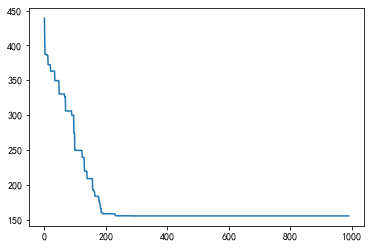

In [419]:
plt.plot(best_iter)